In [1]:
from eeg_data_load import load_eeg_data

dataset_path = "/kaggle/input/eeg-train/train_data"
class_labels = [
    "Normal",
    "Complex_Partial_Seizures",
    "Electrographic_Seizures",
    "Video_detected_Seizures_with_no_visual_change_over_EEG",
]

X, y = load_eeg_data(dataset_path, class_labels)
print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Data shape: (5608, 19, 500)
Labels shape: (5608,)


In [2]:
import numpy as np
from scipy import signal, stats
import pywt
from tqdm import tqdm
import matplotlib.pyplot as plt

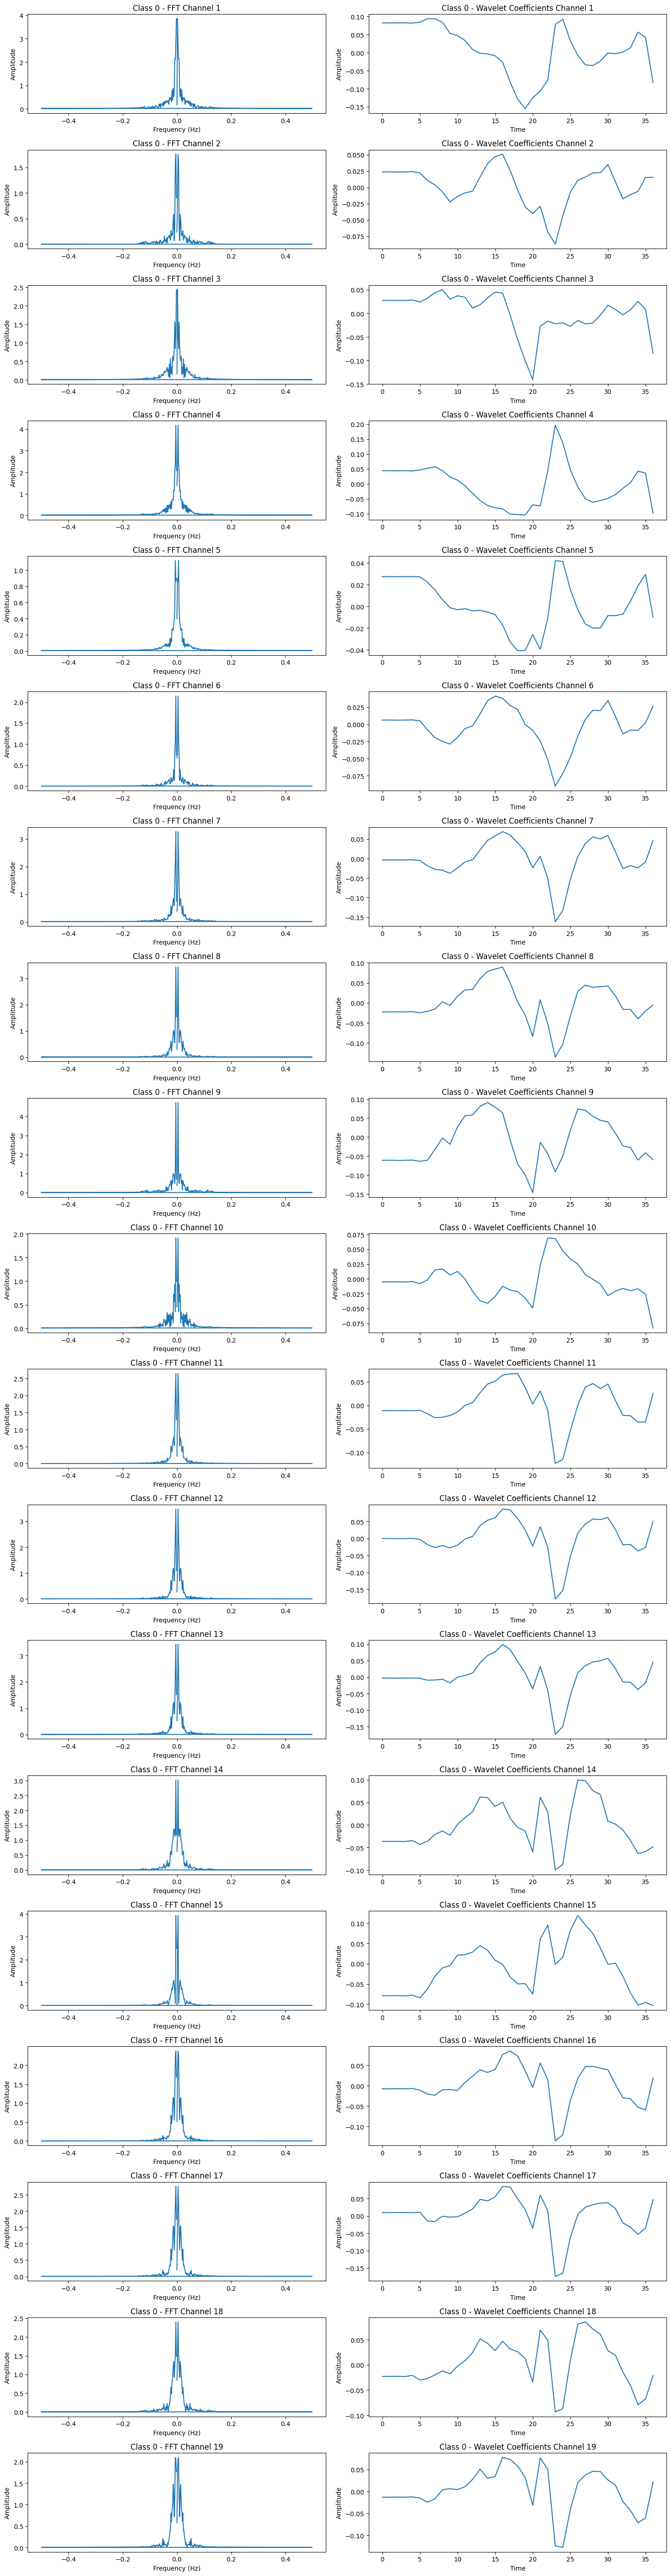

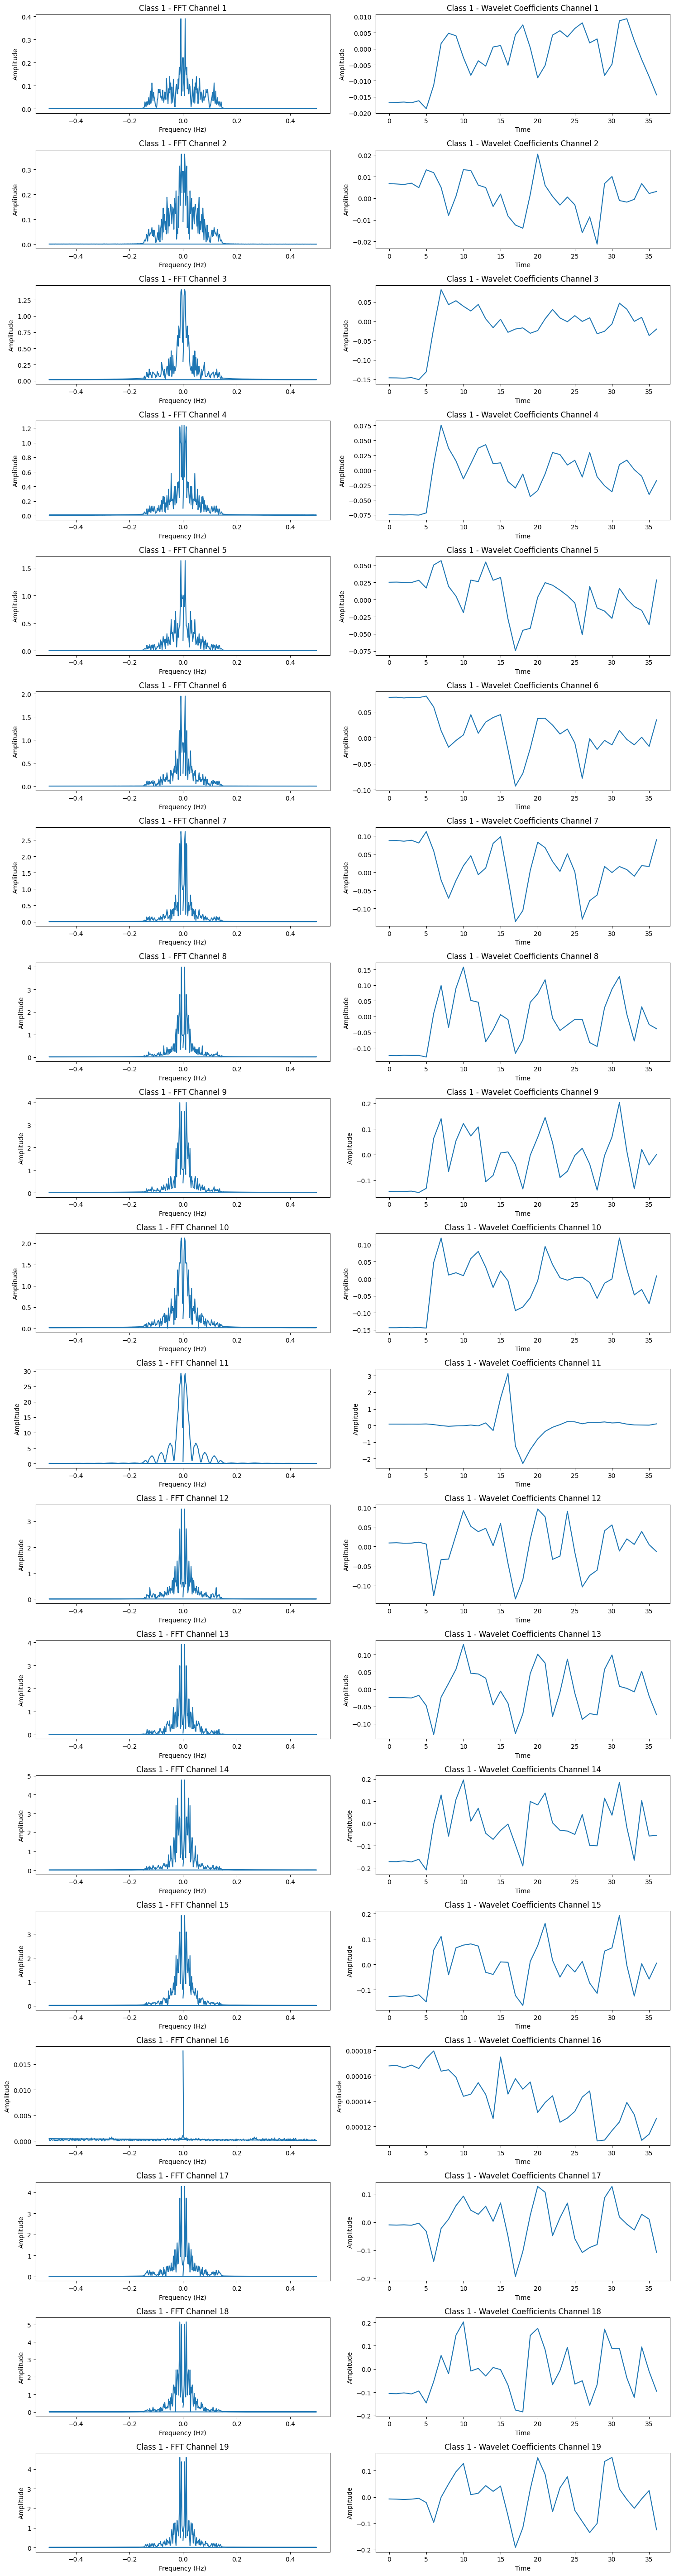

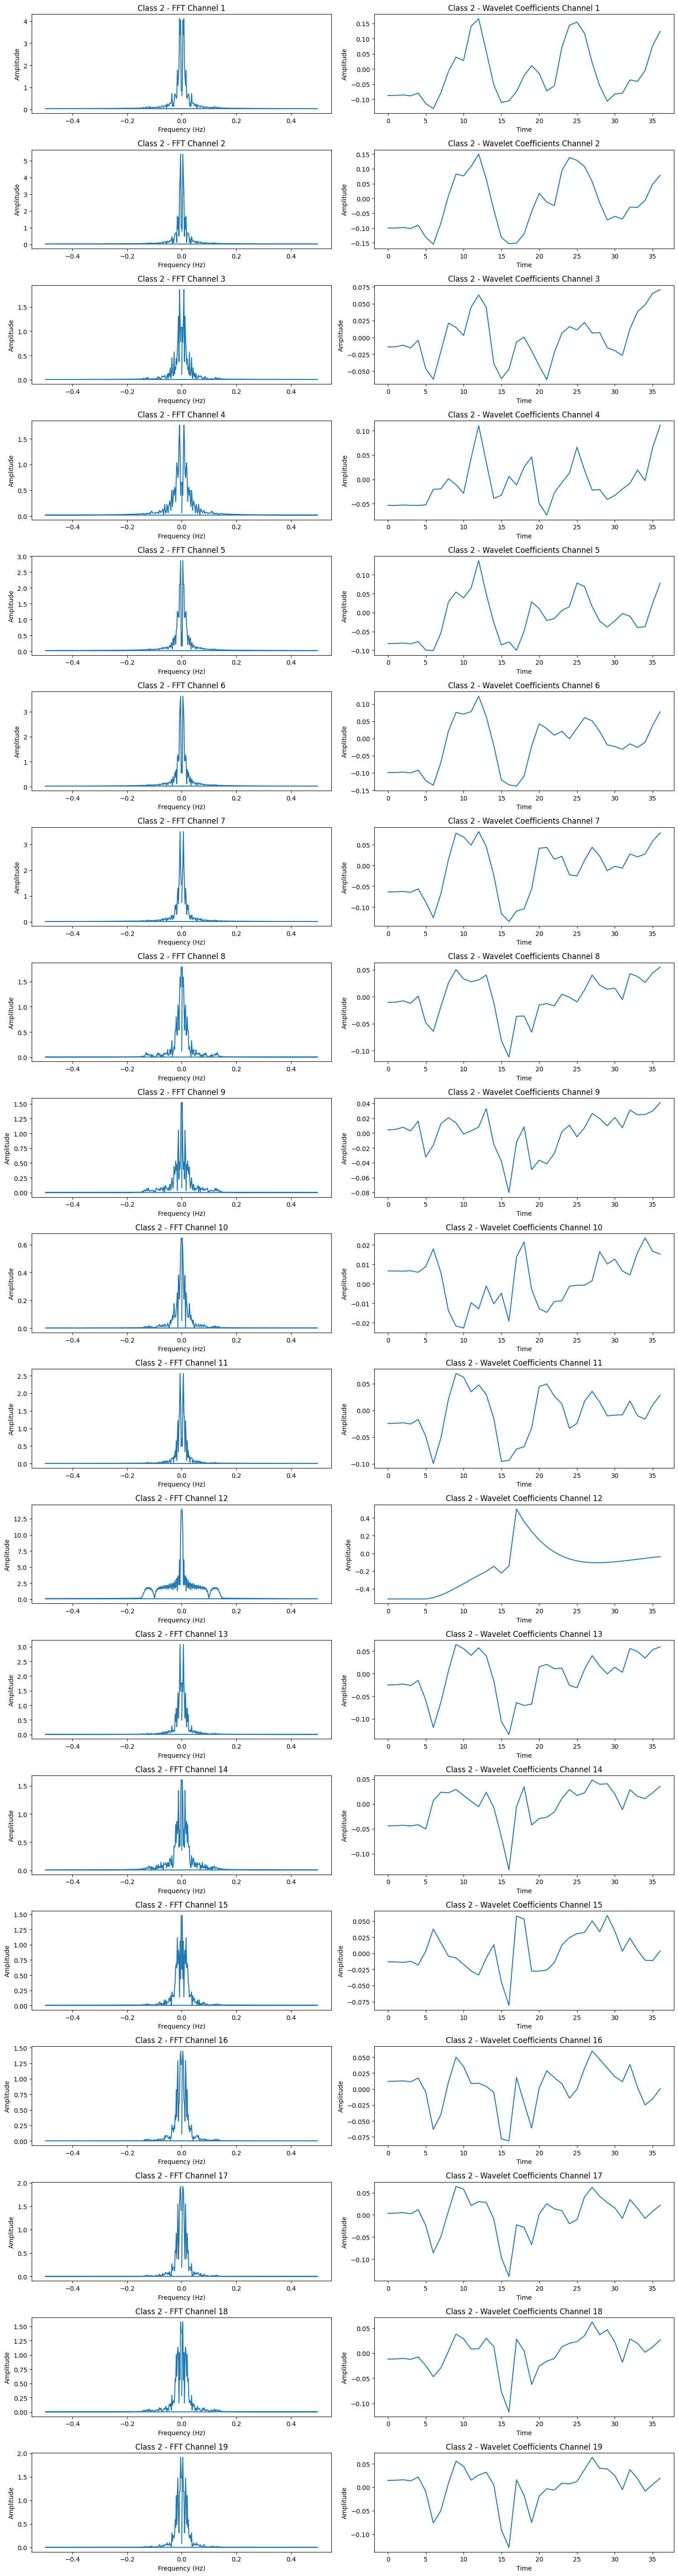

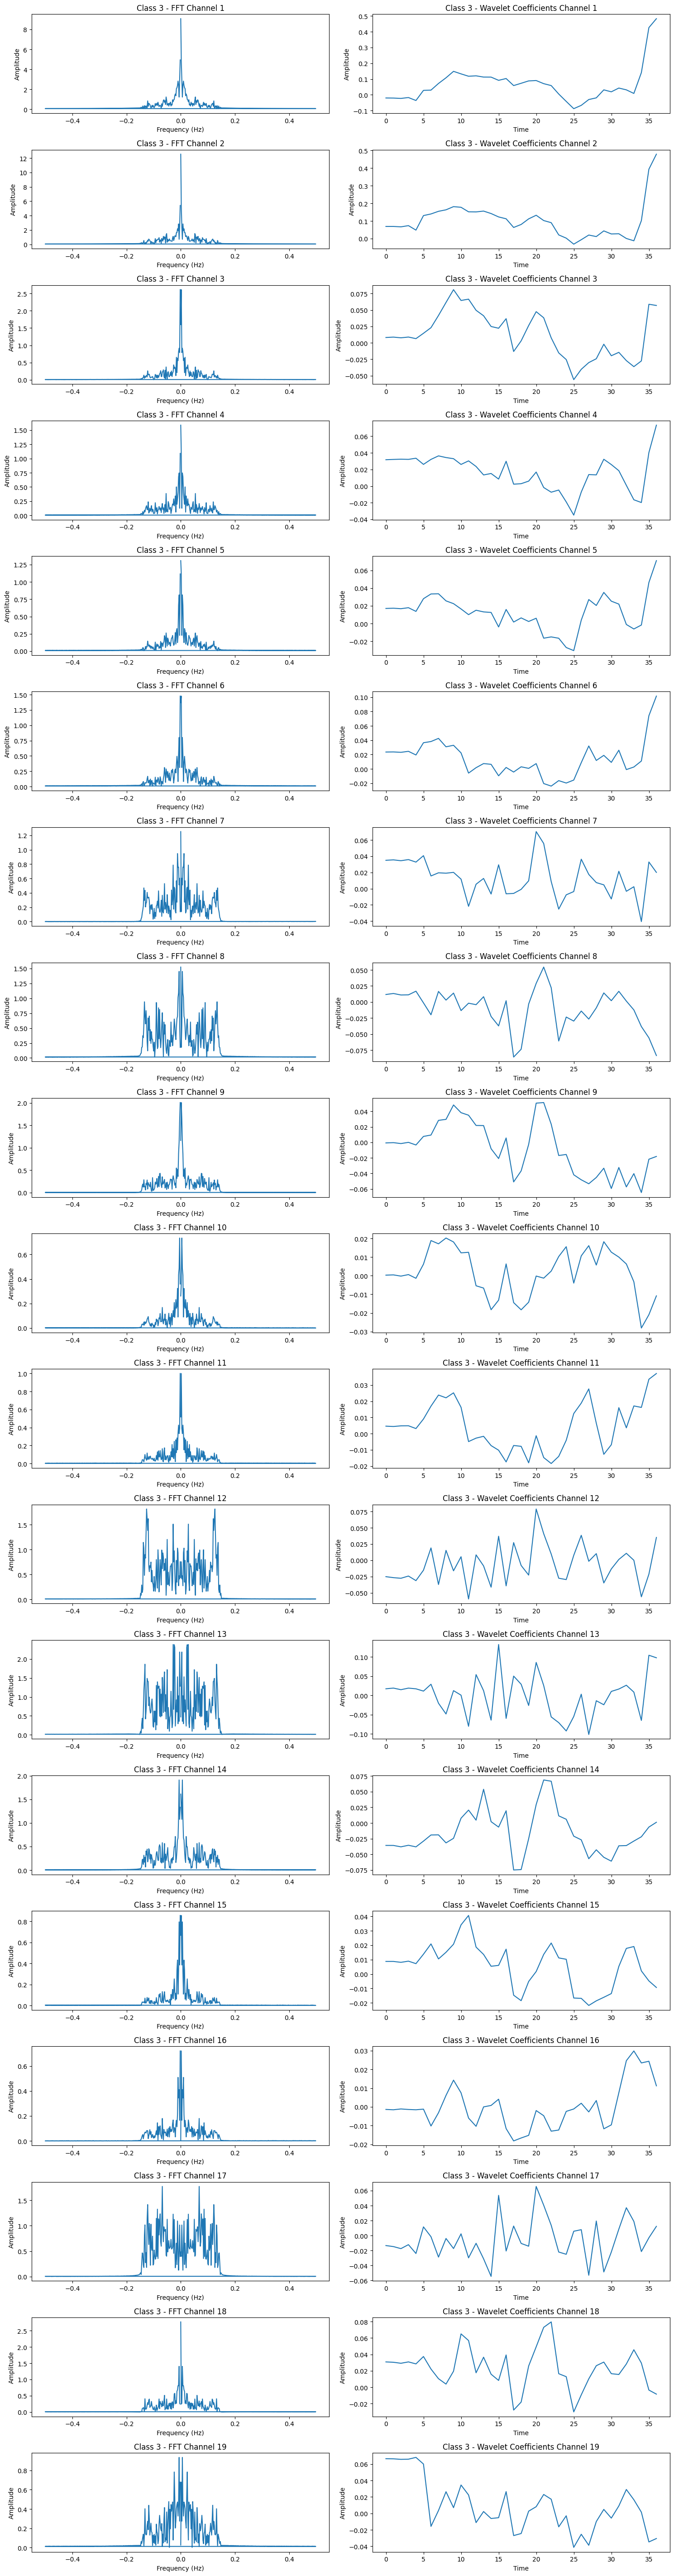

In [3]:
data_point = X[0]  # First data point (shape: 19 channels x 500 time points)
num_channels = data_point.shape[0]  # 19 channels

# Prepare a function to plot FFT and Wavelet Decomposition
def extract_and_plot_features(data_point, label):
    fig, axes = plt.subplots(num_channels, 2, figsize=(15, 3 * num_channels))

    for i in range(num_channels):
        # 1. FFT (Frequency domain)
        fft_class = np.abs(np.fft.fft(data_point[i]))  # Compute FFT for the ith channel
        axes[i, 0].plot(np.fft.fftfreq(data_point.shape[1]), fft_class)
        axes[i, 0].set_title(f'Class {label} - FFT Channel {i+1}')
        axes[i, 0].set_xlabel('Frequency (Hz)')
        axes[i, 0].set_ylabel('Amplitude')
        
        # 2. Wavelet Decomposition (4 levels)
        coeffs_class = pywt.wavedec(data_point[i], 'db4', level=4)  # Perform wavelet decomposition
        
        # Plot approximation coefficients
        axes[i, 1].plot(coeffs_class[0])  # Approximation (low-frequency)
        axes[i, 1].set_title(f'Class {label} - Wavelet Coefficients Channel {i+1}')
        axes[i, 1].set_xlabel('Time')
        axes[i, 1].set_ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Extract and plot features for one data point from each class
unique_labels = np.unique(y)

for label in unique_labels:
    class_data = X[y == label][0]  # Take the first data point from each class
    extract_and_plot_features(class_data, label)


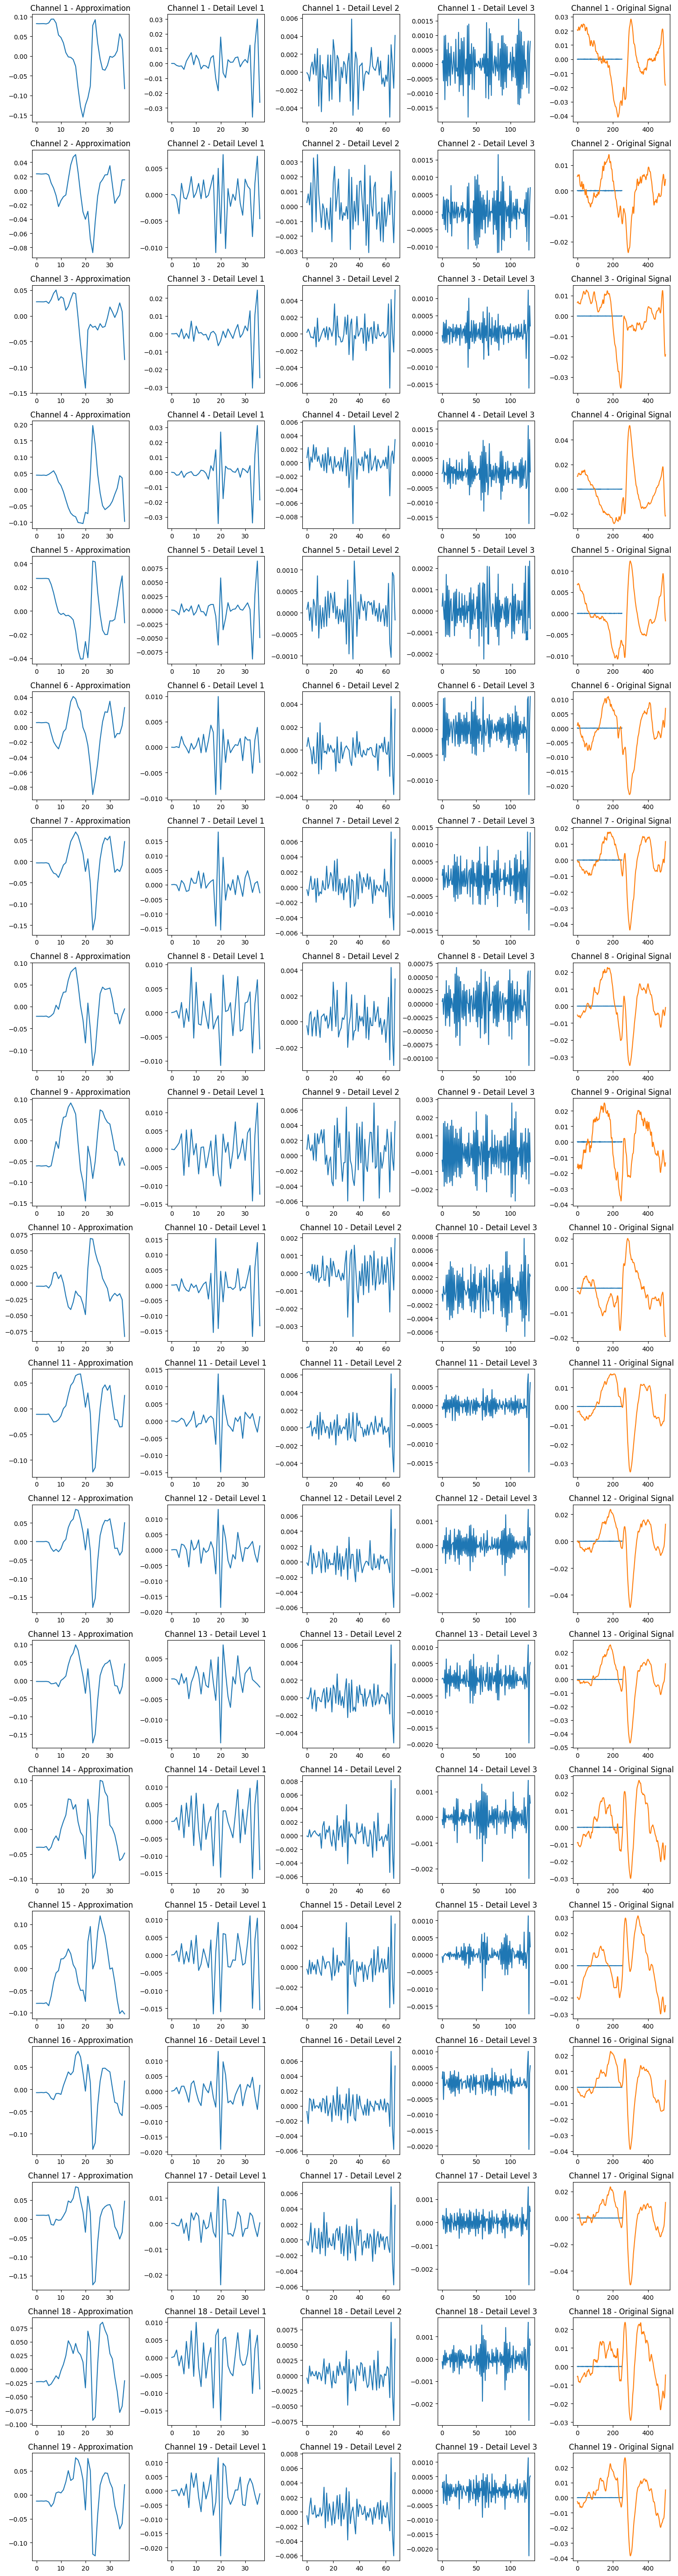

In [4]:
data_point = X[0]  # First data point from the training set
num_channels = data_point.shape[0]  # Number of channels

# Set the number of decomposition levels
wavelet = 'db4'
level = 4

# Set up the plot for the decomposition coefficients
fig, axes = plt.subplots(num_channels, 5, figsize=(15, 3 * num_channels))

for i in range(num_channels):
    # Perform wavelet decomposition for the current channel
    coeffs = pywt.wavedec(data_point[i], wavelet, level=level)
    
    # Plot approximation (low-frequency) coefficients
    axes[i, 0].plot(coeffs[0])  # Approximation coefficients
    axes[i, 0].set_title(f'Channel {i+1} - Approximation')

    # Plot detail (high-frequency) coefficients for each level
    for j in range(1, level + 1):
        axes[i, j].plot(coeffs[j])  # Detail coefficients
        axes[i, j].set_title(f'Channel {i+1} - Detail Level {j}')
    
    # Show the most similar coefficient to the original signal (based on visual inspection)
    axes[i, 4].plot(data_point[i])  # Original signal for comparison
    axes[i, 4].set_title(f'Channel {i+1} - Original Signal')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


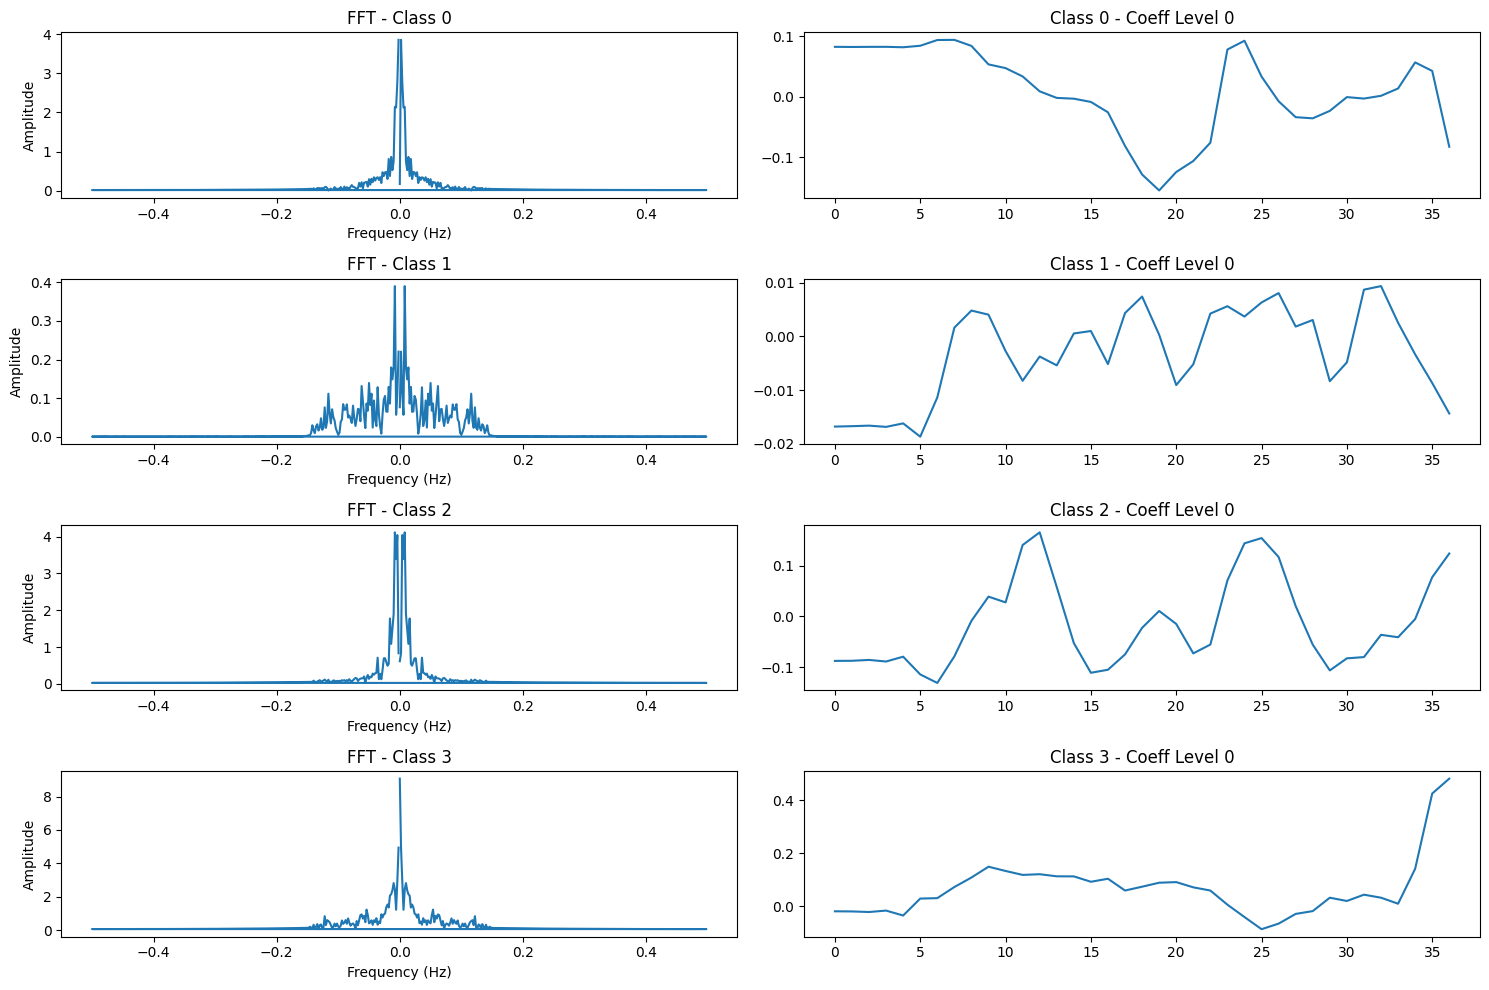

In [5]:
fig, axes = plt.subplots(len(np.unique(y)), 2, figsize=(15, 10))

for idx, label in enumerate(np.unique(y)):
    class_data = X[y == label][0]  # Take the first data point from each class
    
    # FFT of the first channel in this class
    fft_class = np.abs(np.fft.fft(class_data[0]))
    
    # Plot FFT in the first column of the current row
    axes[idx, 0].plot(np.fft.fftfreq(class_data.shape[-1]), fft_class)
    axes[idx, 0].set_title(f'FFT - Class {label}')
    axes[idx, 0].set_xlabel('Frequency (Hz)')
    axes[idx, 0].set_ylabel('Amplitude')
    
    # Wavelet Decomposition for the first channel in this class
    coeffs_class = pywt.wavedec(class_data[0], 'db4', level=4)
    
    # Plot wavelet coefficients in the second column of the current row
    for i, ax in enumerate(axes[idx, 1:]):
        ax.plot(coeffs_class[i])
        ax.set_title(f'Class {label} - Coeff Level {i}')
    
plt.tight_layout()  # Adjust spacing to avoid overlap
plt.show()


In [6]:
len(X)

5608

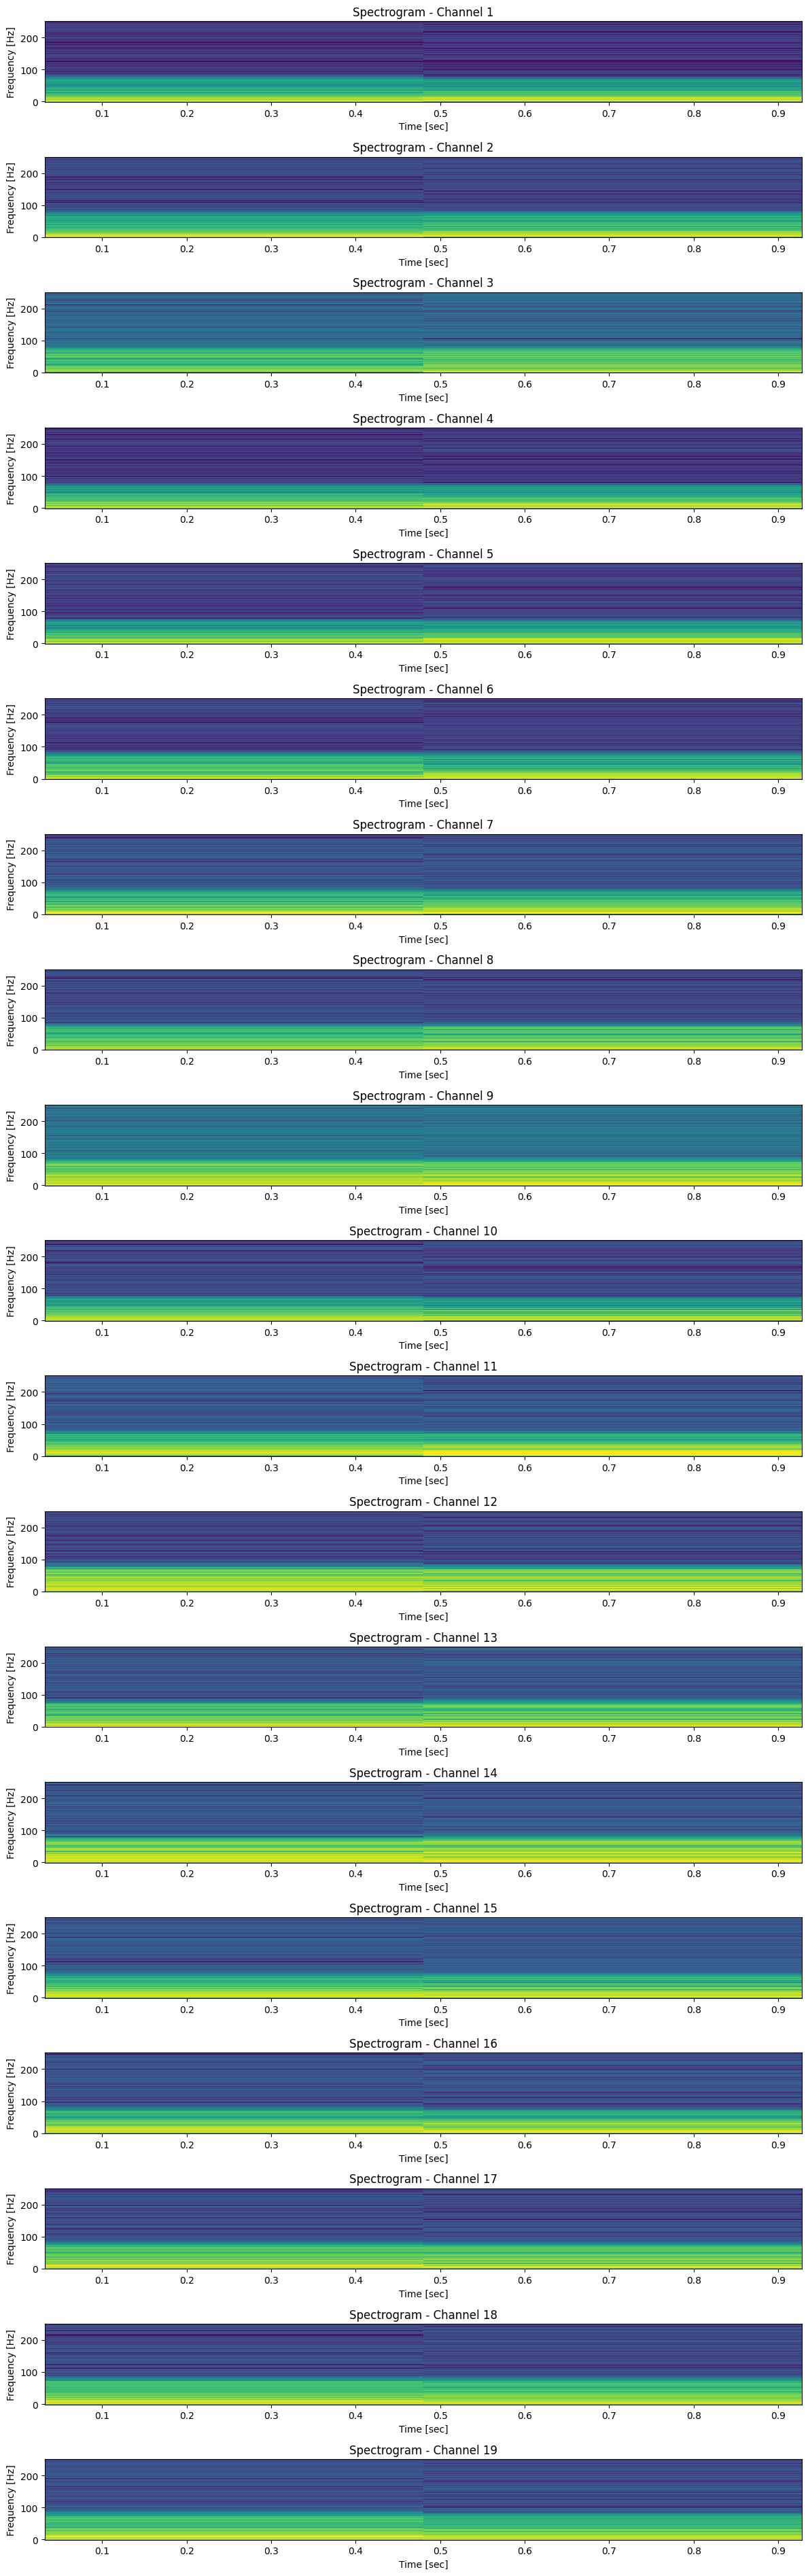

In [7]:
from scipy.signal import spectrogram
import random

random_sample = random.randint(0, len(X) - 1)

data_point = X[random_sample]  

# Number of channels in the data point
num_channels = data_point.shape[0]

fs = 500

# Plot spectrograms for each channel
fig, axes = plt.subplots(num_channels, 1, figsize=(12, 2 * num_channels))

for i in range(num_channels):
    # Generate spectrogram for the ith channel
    f, t, Sxx = spectrogram(data_point[i], fs)
    
    # Plot the spectrogram with logarithmic scaling
    axes[i].pcolormesh(t, f, np.log(Sxx), shading='auto')
    axes[i].set_title(f'Spectrogram - Channel {i+1}')
    axes[i].set_xlabel('Time [sec]')
    axes[i].set_ylabel('Frequency [Hz]')

plt.tight_layout()
plt.show()